# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [ ]:
# The tag name is div and the class name is product-info

### What is the tag name and class name for the old price? The new price?

In [ ]:
# The tag name is span and the class name for the old price is old-price

In [ ]:
# The tag name is span and the class name for the new price is price

### What is the tag name and class name for the link to the product page?

In [ ]:
# class = product-url js-product-tracking, tag = 'a' 

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [165]:
import requests
from bs4 import BeautifulSoup

In [166]:
headers = {
    'Origin': 'http://www.hm.com',
    'Accept-Encoding': 'gzip, deflate, sdch'
}


url = ('http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP')
response = requests.get(url, headers = headers)

In [167]:
data = response.json()
data

{'content': [],
 'displayArticles': [{'activityArticleNumber': '052683',
   'additionalImages': [],
   'articleCode': '47468-E',
   'assortmentState': 'CURRENT',
   'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
    {'sizeName': 'S', 'stockSize': '004'},
    {'sizeName': 'L', 'stockSize': '006'}],
   'availableSwatches': [{'articleCode': '47468-E',
     'castorArticleId': '0372097010',
     'colour': 'f24e32',
     'fabricImageResource': '/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg',
     'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
   'castorArticleNumber': '010',
   'castorProductNumber': '0372097',
   'colourDescription': 'Powder beige',
   'departments': [{'code': 'LADIES',
     'name': 'NAVIGATION.LABEL.DEPARTMENT.LADIES',
     'paths': ['LADIES/LADIES_MODERNCLASSICS/LADIES_MODERNCLASSICS_TOPS',
      'LADIES/LADIES_TOPS/LADIES_TOPS_VESTS_SLEEVELESS']}],
   'n

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

## URLs

### What is the URL for data about on-sale men's clothing?

In [ ]:
url = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [ ]:
url = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [ ]:
url = http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'

### What changes about the url based on what you're looking for?

In [ ]:
# Based on whether I look for men's clothing or women's clothing the part after "categories=sale" changes accordingly

## Request on-sale women's tops.

### How many results do you get?

In [164]:
len(data['displayArticles'])

60

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [168]:
empty = []
tops = data['displayArticles']
for code in tops:
    current = {}
    current['name'] = code['name']
    current['number'] = code['castorProductNumber']
    current['price'] = code['priceInfo']['formattedPrice']
    current['old_price'] = code['priceInfo']['formattedOldPrice']
    current['url'] = code['webUrl']
    print(current)
    empty.append(current)

{'name': 'Beaded Camisole Top', 'number': '0372097', 'price': '$7.99', 'old_price': '$17.99', 'url': 'http://www.hm.com/us/product/47468?article=47468-E'}
{'name': 'V-neck Top', 'number': '0506679', 'price': '$7.99', 'old_price': '$17.99', 'url': 'http://www.hm.com/us/product/69690?article=69690-A'}
{'name': 'V-neck Top', 'number': '0506679', 'price': '$7.99', 'old_price': '$17.99', 'url': 'http://www.hm.com/us/product/69690?article=69690-B'}
{'name': 'Long-sleeved Jersey Top', 'number': '0474209', 'price': '$19.99', 'old_price': '$24.99', 'url': 'http://www.hm.com/us/product/64062?article=64062-A'}
{'name': 'Draped Top', 'number': '0461815', 'price': '$9.99', 'old_price': '$19.99', 'url': 'http://www.hm.com/us/product/61712?article=61712-B'}
{'name': 'Long-sleeved Top', 'number': '0437548', 'price': '$14.99', 'old_price': '$24.99', 'url': 'http://www.hm.com/us/product/56522?article=56522-E'}
{'name': 'Long-sleeved Top', 'number': '0437548', 'price': '$12.99', 'old_price': '$24.99', 'u

In [169]:
import pandas as pd
%matplotlib inline

In [170]:
df = pd.DataFrame(empty)
df

,name,number,old_price,price,url
0,Beaded Camisole Top,0372097,$17.99,$7.99,http://www.hm.com/us/product/47468?article=474...
1,V-neck Top,0506679,$17.99,$7.99,http://www.hm.com/us/product/69690?article=696...
2,V-neck Top,0506679,$17.99,$7.99,http://www.hm.com/us/product/69690?article=696...
3,Long-sleeved Jersey Top,0474209,$24.99,$19.99,http://www.hm.com/us/product/64062?article=640...
4,Draped Top,0461815,$19.99,$9.99,http://www.hm.com/us/product/61712?article=617...
5,Long-sleeved Top,0437548,$24.99,$14.99,http://www.hm.com/us/product/56522?article=565...
6,Long-sleeved Top,0437548,$24.99,$12.99,http://www.hm.com/us/product/56522?article=565...
7,Long-sleeved Top,0437548,$24.99,$14.99,http://www.hm.com/us/product/56522?article=565...
8,Jersey Camisole Top,0377266,$4.99,$3.99,http://www.hm.com/us/product/46245?article=462...
9,T-shirt with Motif,0452894,$12.99,$9.99,http://www.hm.com/us/product/60675?article=606...


## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [171]:
df.shape

(60, 5)

### Convert the prices to numbers, if you haven't already

In [137]:
df['price'] = df['price'].str.replace('$', '')
df['old_price'] = df['old_price'].str.replace('$', '')
df

,name,number,old_price,price,url
0,Beaded Camisole Top,0372097,17.99,7.99,http://www.hm.com/us/product/47468?article=474...
1,V-neck Top,0506679,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
2,V-neck Top,0506679,17.99,7.99,http://www.hm.com/us/product/69690?article=696...
3,Long-sleeved Jersey Top,0474209,24.99,19.99,http://www.hm.com/us/product/64062?article=640...
4,Draped Top,0461815,19.99,9.99,http://www.hm.com/us/product/61712?article=617...
5,Long-sleeved Top,0437548,24.99,14.99,http://www.hm.com/us/product/56522?article=565...
6,Long-sleeved Top,0437548,24.99,12.99,http://www.hm.com/us/product/56522?article=565...
7,Long-sleeved Top,0437548,24.99,14.99,http://www.hm.com/us/product/56522?article=565...
8,Jersey Camisole Top,0377266,4.99,3.99,http://www.hm.com/us/product/46245?article=462...
9,T-shirt with Motif,0452894,12.99,9.99,http://www.hm.com/us/product/60675?article=606...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [138]:
df['price'] = df['price'].astype(float)
new = df['price'].mean()
new

10.107333333333335

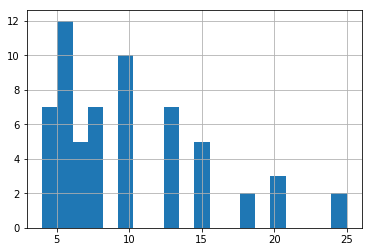

In [139]:
df['price'].hist(bins=20)

### What is the average discount between full price and on sale? Histogram too, please.

In [149]:
df['discount'] = df['old_price'].astype(float).sub(df['price']).astype(float)
df['discount'].mean()

7.4493333333333318

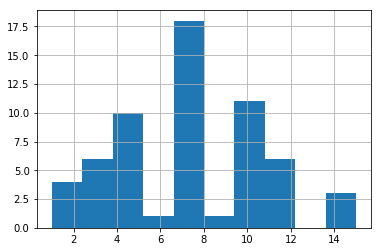

In [154]:
df['discount'].hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

In [157]:
df['percentage'] = df['discount'].astype(float) / df['old_price'].astype(float)
df['percentage'].mean()

0.42531065612685448

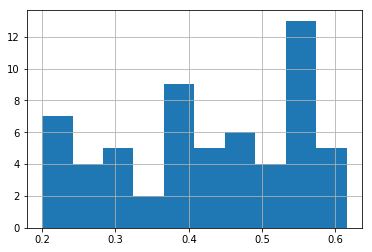

In [158]:
df['percentage'].hist()

## Shopping the sales

### How many items are over 50% off?


In [161]:
over_fifty = df['percentage'] < 0.500000
len(over_fifty)

60

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**